# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [2]:
Loan = pd.read_csv("Loan_Modelling.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
data.shape

(5000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations:

The dataset has 5000 rows and 14 columns with no null values so missing value treatment will not be necessary.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations:

The 'ID' column is not needed for future EDA and will be dropped. 

The minimum value in 'Experience' is -3.0. Assuming this is an error, negative values in 'Experience' will be changed to absolute values to ensure only positive values are present in the column.

The IQR for 'Mortgage' is 0 at the 25th and 50th percentile but 101k at the 75th percentile which warrants further investigation. 

Zip codes are being represented numerically but should be treated as categorical data. 'ZIPCode' will be grouped into a smaller number of representative regions to enhance legibility. 

In [9]:
# ID values are not relevant to our analysis so the column is dropped

data = data.drop(columns = "ID")

In [10]:
# Convert 'ZIPCode' to string, extract the first two digits, and create a new column for the regional code as integers

data["ZIPCode_Region"] = data["ZIPCode"].astype(str).str[:2].astype(int)

# Display the first few rows to verify the new 'ZIPCode_Region' column

data["ZIPCode_Region"].nunique()

7

### Observations:

After grouping the 'ZIPCode' by the first two digits of the values, I determined there are 7 unique zip code regions we can use to make this data more legible.

# Exploratory Data Analysis

## Univariate Analysis

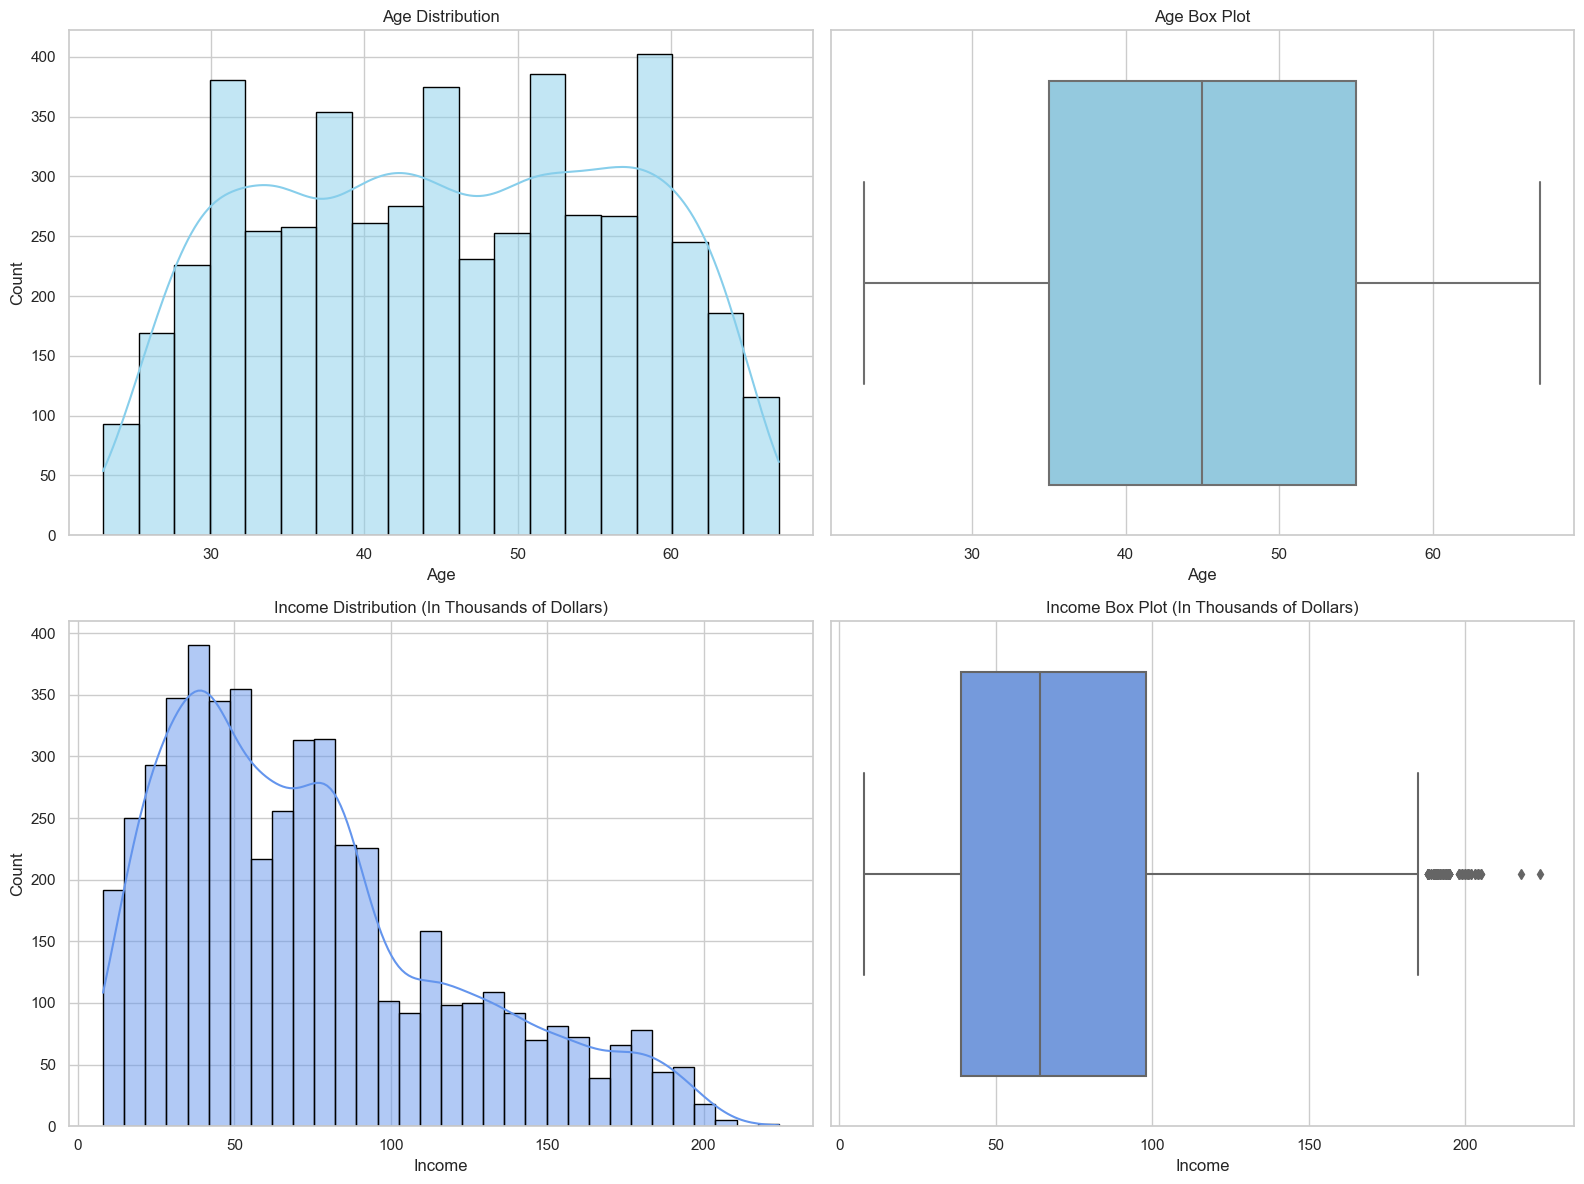

In [11]:
# Improve visualization readability

sns.set(style="whitegrid")

# Create a figure to display the visualizations

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for Age

sns.histplot(data['Age'], kde=True, color="skyblue", edgecolor='black', ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

# Box plot for Age

sns.boxplot(x=data['Age'], color="skyblue", ax=ax[0, 1])
ax[0, 1].set_title('Age Box Plot')

# Histogram for Income

sns.histplot(data['Income'], kde=True, color="cornflowerblue", edgecolor='black', ax=ax[1, 0])
ax[1, 0].set_title('Income Distribution (In Thousands of Dollars)')

# Box plot for Income

sns.boxplot(x=data['Income'], color="cornflowerblue", ax=ax[1, 1])
ax[1, 1].set_title('Income Box Plot (In Thousands of Dollars)')

plt.tight_layout()
plt.show()

### Observations:

**Age Distribution**: The age of customers appears to be fairly uniformly distributed across the range present in the dataset. This suggests a wide variety of customers in terms of age.

The box plot shows that there are no extreme outliers in the age data, and the age distribution seems relatively symmetrical.

**Income Distribution**: Income is right-skewed, indicating that a majority of the bank's customers fall into the lower income brackets, with fewer customers having higher incomes.

The box plot for income reveals the presence of outliers on the higher end. This suggests that while most customers have an income within a certain range, there are a few with significantly higher incomes.

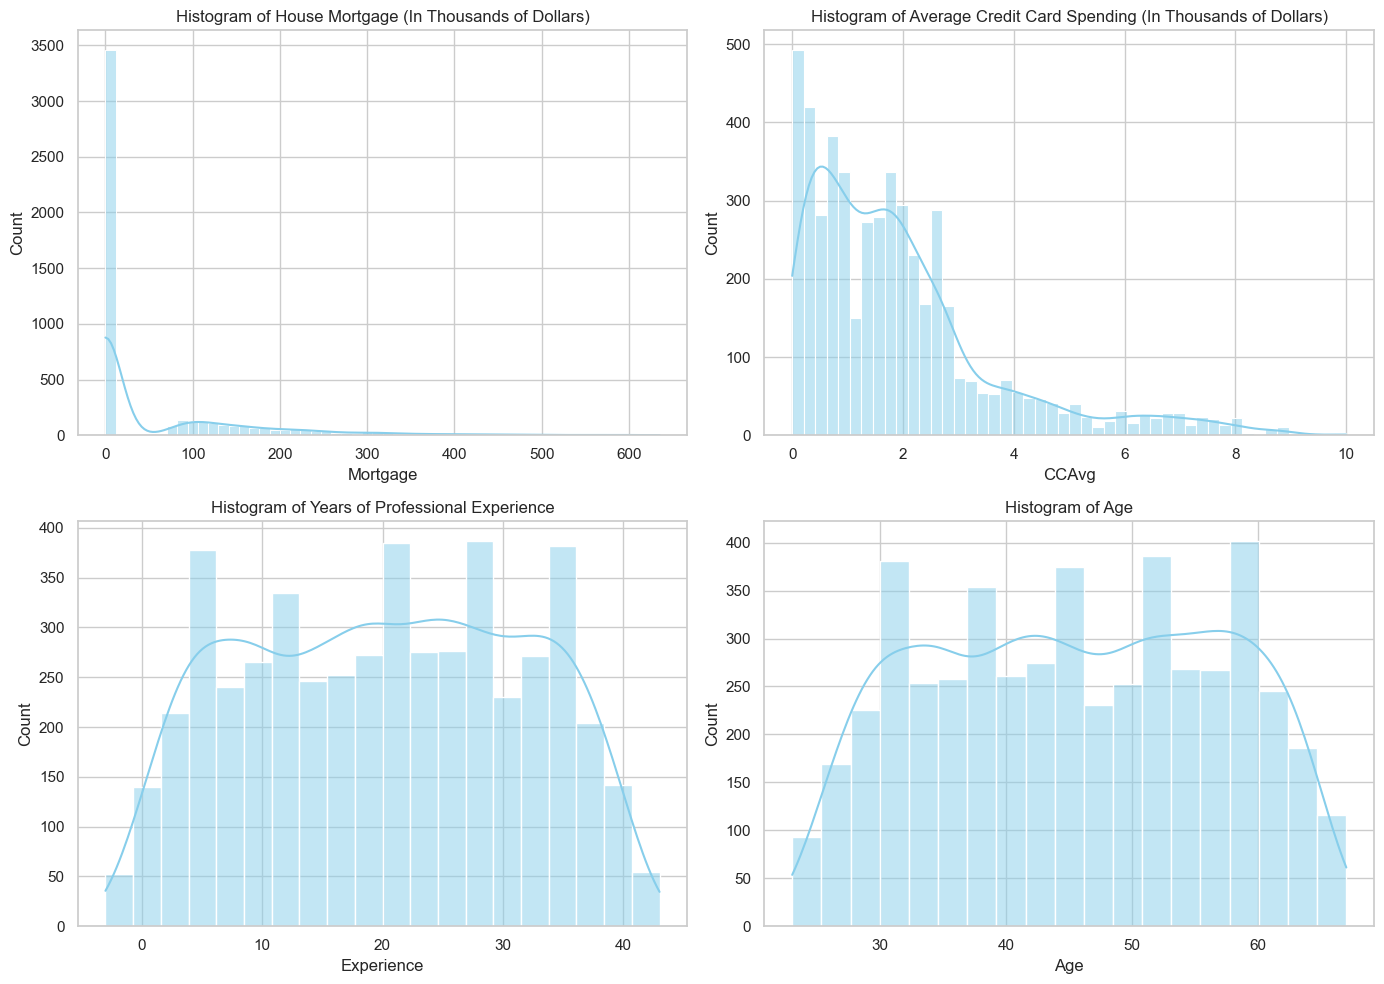

In [12]:
# Creating histograms for Mortgage, CCAvg, Experience, and Age separately

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjusted to have 4 plots in a 2x2 layout

# Adjusting the layout

plt.tight_layout(pad=3.0)

# Histogram for Mortgage

sns.histplot(data['Mortgage'], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Histogram of House Mortgage (In Thousands of Dollars)')

# Histogram for CCAvg

sns.histplot(data['CCAvg'], kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Average Credit Card Spending (In Thousands of Dollars)')

# Histogram for Experience

sns.histplot(data['Experience'], kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Years of Professional Experience')

# Histogram for Age

sns.histplot(data['Age'], kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Age')

# Adjusting layout to prevent overlap

plt.tight_layout()
plt.show()

### Observations:

**Mortgage**: The histogram for "Mortgage" shows a right-skewed distribution, indicating that most customers have low or no mortgage amounts, with a few having higher mortgage values.

**CCAvg**: Similar to "Mortgage", the "CCAvg" (average spending on credit cards per month) also exhibits a right-skewed distribution, highlighting that most customers have lower average spending, while a smaller portion spends significantly more.

**Experience**: The distribution of "Experience" appears more uniform across different values but with a slight right skew. It suggests a broad range of experience levels among the customers, from newcomers to those with extensive career histories.

**Age**: The "Age" distribution is quite uniform, indicating that the bank's customers are well-distributed across different ages, without significant skewness.

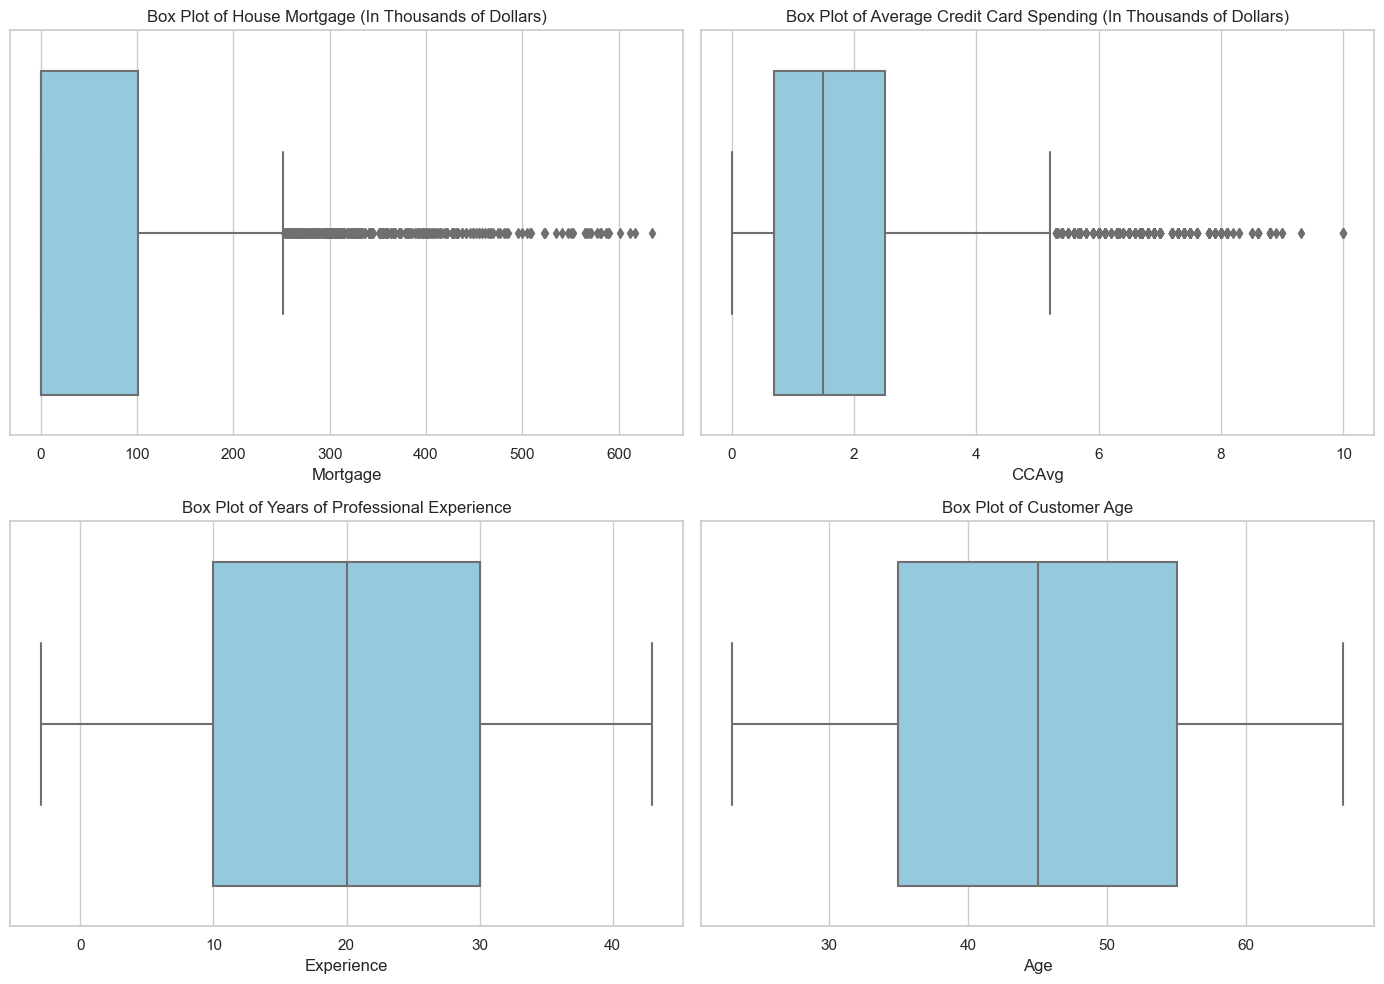

In [13]:
# Creating box plots for Mortgage, CCAvg, Experience, and Age separately

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjusted to have 4 plots in a 2x2 layout

# Adjusting the layout

plt.tight_layout(pad=3.0)

# Box plot for Mortgage

sns.boxplot(x=data['Mortgage'], color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of House Mortgage (In Thousands of Dollars)')

# Box plot for CCAvg

sns.boxplot(x=data['CCAvg'], color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Average Credit Card Spending (In Thousands of Dollars)')

# Box plot for Experience

sns.boxplot(x=data['Experience'], color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Years of Professional Experience')

# Box plot for Age

sns.boxplot(x=data['Age'], color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Customer Age')

# Adjusting layout to prevent overlap

plt.tight_layout()
plt.show()

### Observations:

**Mortgage**: The box plot reveals a large number of outliers above the upper quartile, indicating that while most customers have low or no mortgage values, there are some with significantly high mortgages.

**CCAvg**: Similar to "Mortgage", "CCAvg" shows many outliers above the upper quartile, suggesting that a smaller number of customers have a high average credit card spending per month compared to the rest.

**Experience**: The distribution of experience levels among the bank's customers is more centralized, with fewer outliers. This suggests that the experience levels are relatively evenly distributed among the bank's clientele.

**Age**: The age distribution is quite uniform, with no significant outliers, indicating a broad and evenly distributed age range among the customers.

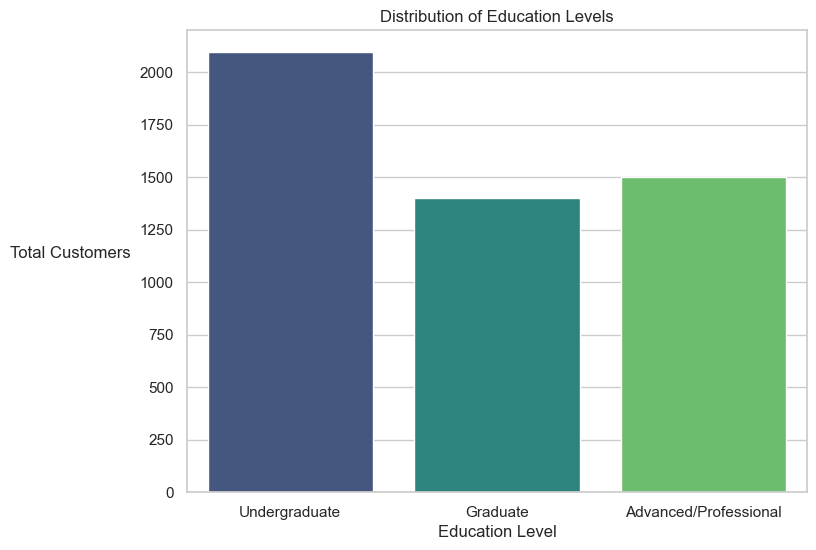

In [14]:
# Bar chart for the Education variable

plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data, palette="viridis")
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Total Customers', labelpad=50, rotation=0)
plt.xticks(ticks=[0, 1, 2], labels=['Undergraduate', 'Graduate', 'Advanced/Professional'])
plt.show()

# Determine education level value counts
#education_counts = data['Education'].value_counts()
#education_counts

### Observations:

The dataset has 2096 customers with undergraduate degrees, 1403 customers with graduate degrees, and 1501 customers with advanced / professional degrees.

* A significant number of customers have an undergraduate level of education, making it the most common education level in this dataset.

* The number of customers with a graduate level of education is slightly less but still substantial.

* Customers with advanced or professional degrees represent the smallest group but still form a considerable portion of the bank's clientele.

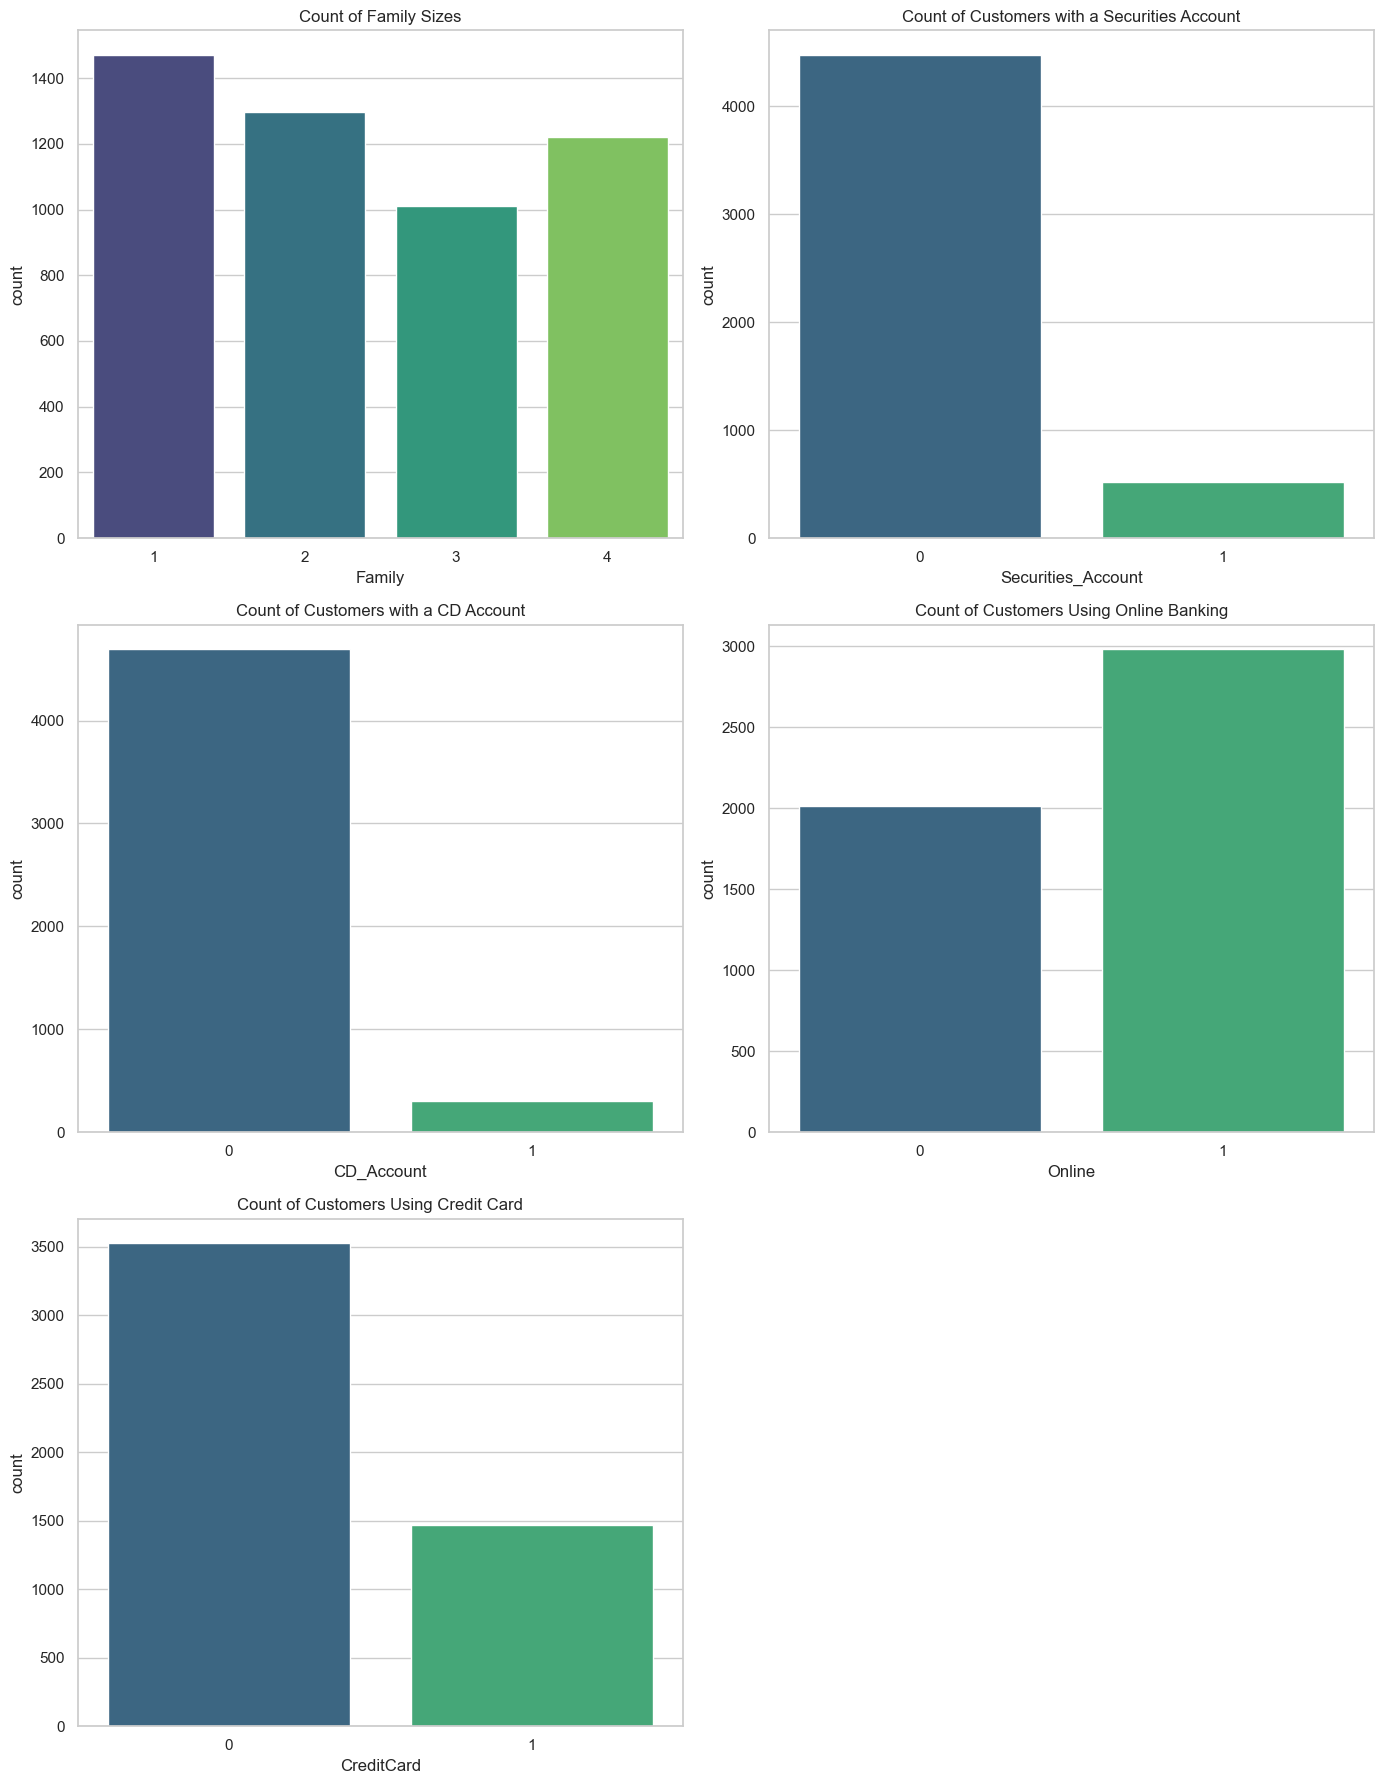

In [15]:
# Creating count plots for categorical variables: Family, Securities_Account, CD_Account, Online, and CreditCard

fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # Adjusted for 5 plots; one plot will be empty

# Adjusting the layout

plt.tight_layout(pad=3.0)

# Count plot for Family

sns.countplot(x=data['Family'], ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Count of Family Sizes')

# Count plot for Securities_Account

sns.countplot(x=data['Securities_Account'], ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Count of Customers with a Securities Account')

# Count plot for CD_Account

sns.countplot(x=data['CD_Account'], ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Count of Customers with a CD Account')

# Count plot for Online

sns.countplot(x=data['Online'], ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Count of Customers Using Online Banking')

# Count plot for CreditCard

sns.countplot(x=data['CreditCard'], ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title('Count of Customers Using Credit Card')

# Hiding the empty subplot

axes[2, 1].set_visible(False)

# Adjusting layout to prevent overlap

plt.tight_layout()
plt.show()

#unique_counts = data['Online'].value_counts()
#unique_counts

### Observations:

The **"CreditCard"** column has 3530 customers without credit cards and 1470 customers with credit cards.

The **"Family"** column has 1472 customers who are single, 1296 customers with 2 family members total, 1010 customers with 3 family members total, and 1222 customers with 4 family members total.

The **"CD_Account"** column has 4698 customers without a certificate of deposit account with the bank and 302 customers with a certificate of deposite at the bank.

The **"Securities_Account"** column has 4478 customers without a securities account with the bank and 522 customers with a securities account with the bank.

The **"Online"** column has 2984 customers who use internet banking facilities and 2016 customers who do not./

### Multivariate Analysis

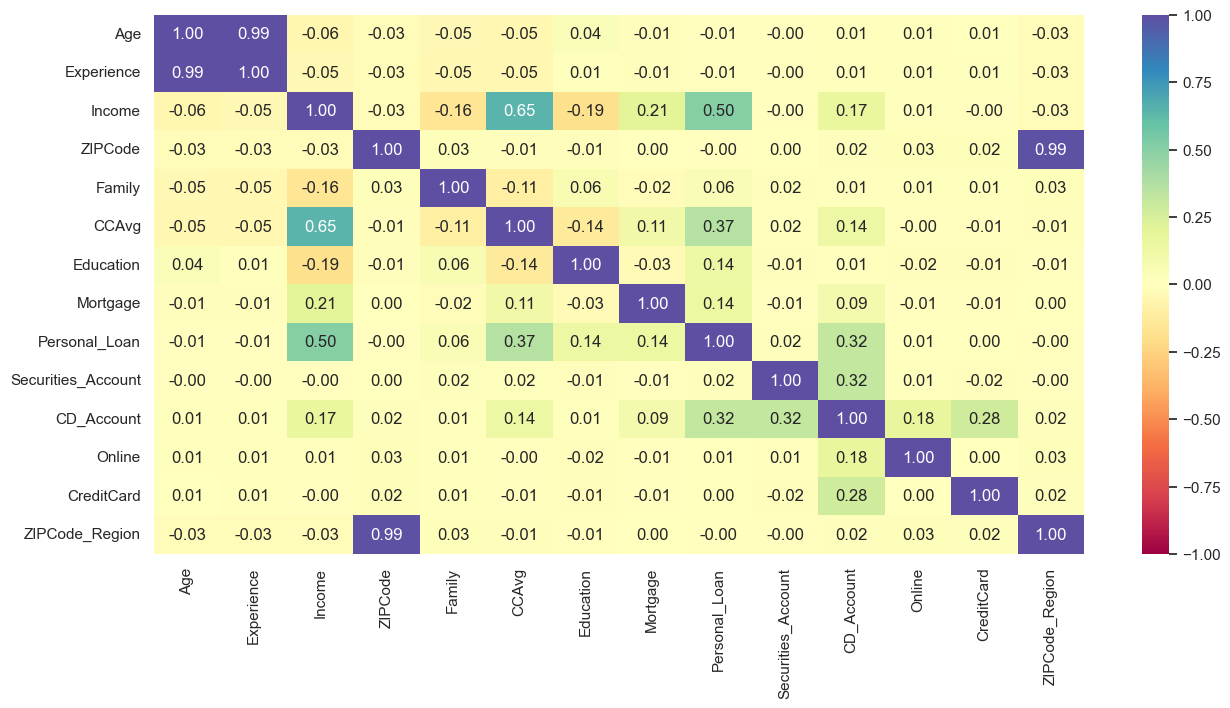

In [16]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

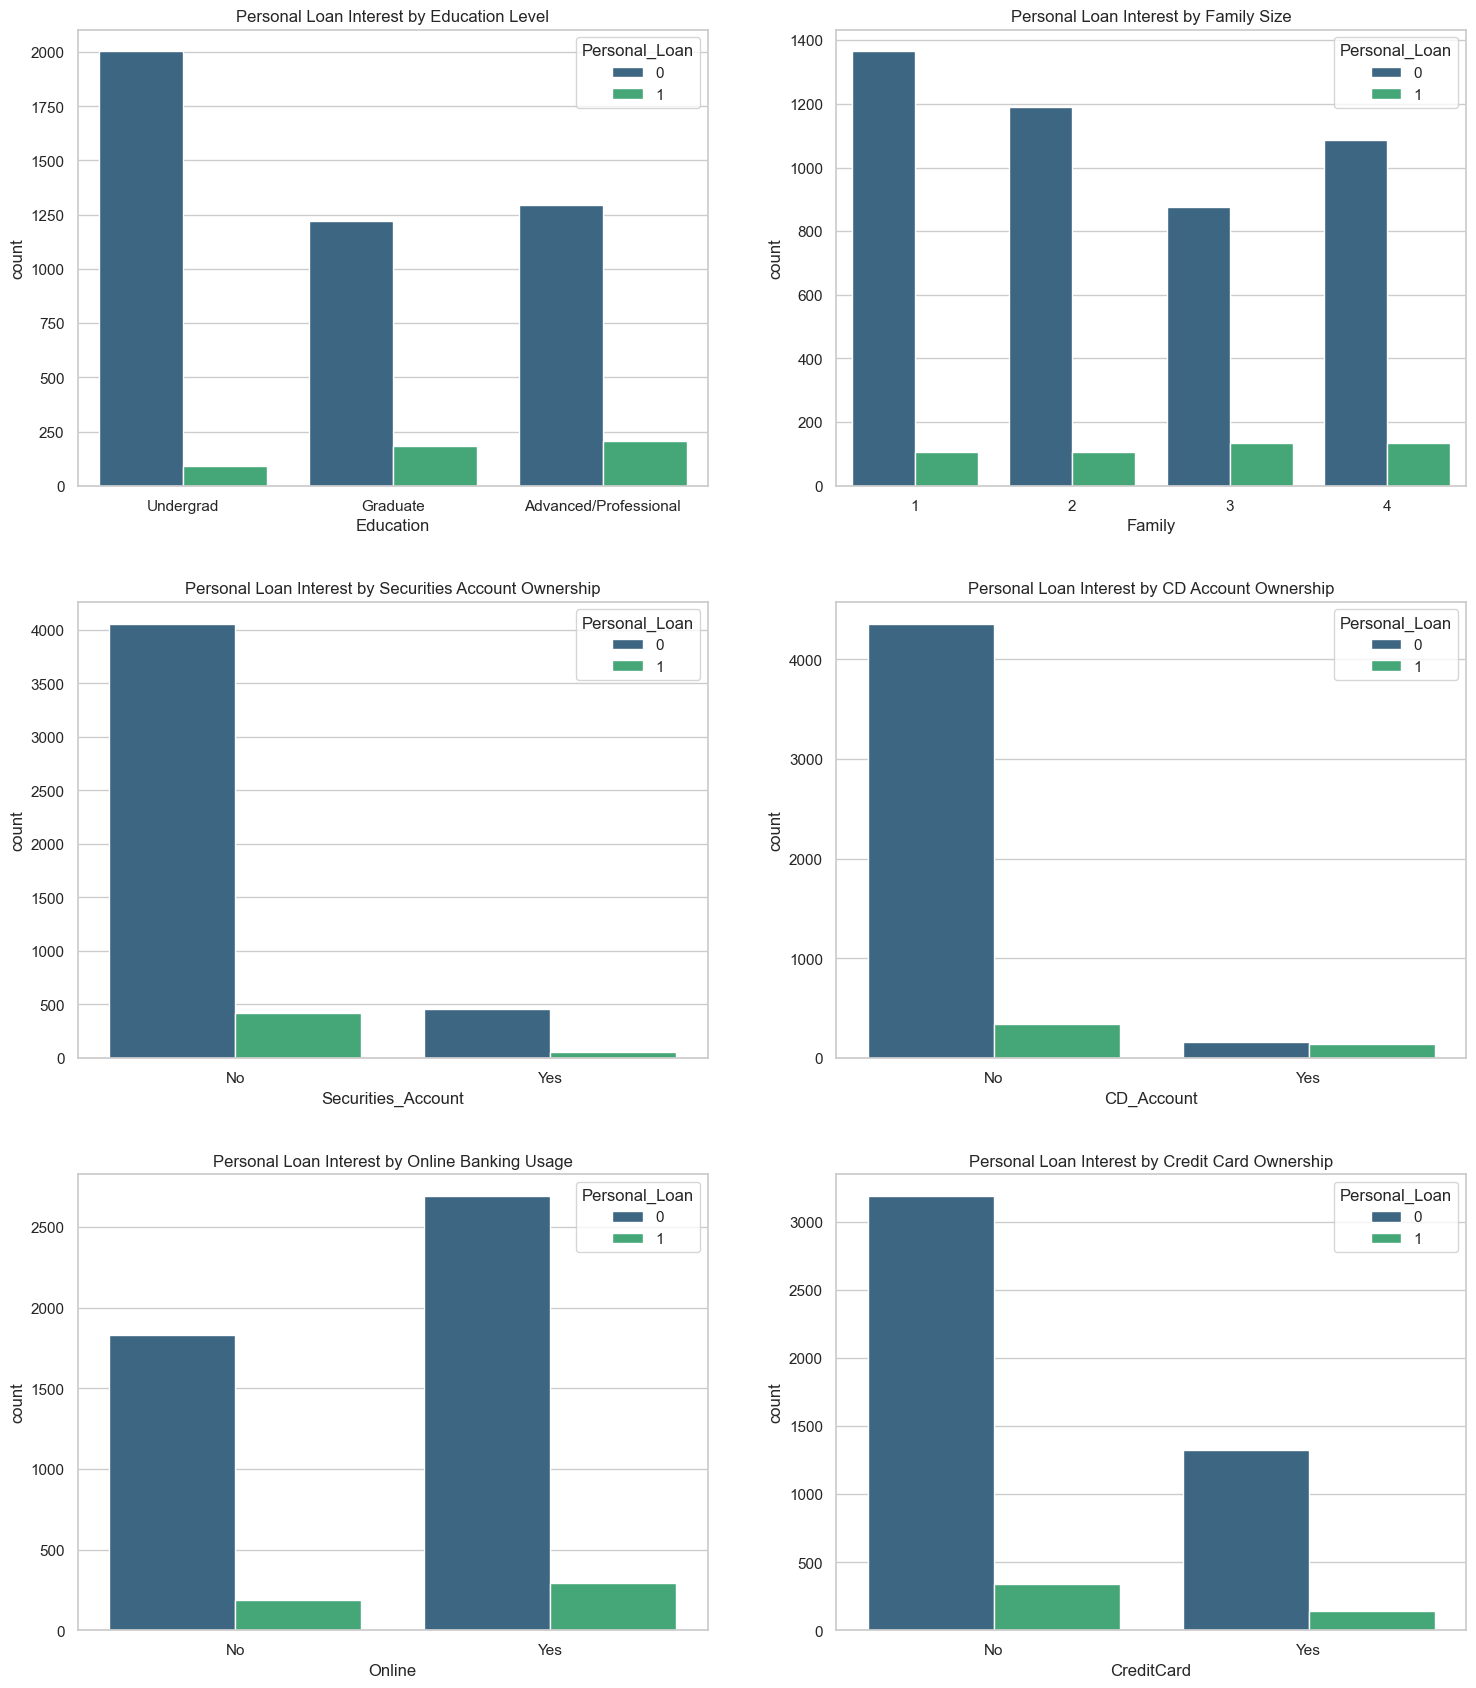

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Adjusting the layout
plt.tight_layout(pad=5.0)

# Plot for Education vs Personal Loan

sns.countplot(x='Education', hue='Personal_Loan', data=data, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Personal Loan Interest by Education Level')
axes[0, 0].set_xticklabels(['Undergrad', 'Graduate', 'Advanced/Professional'])

# Plot for Family vs Personal Loan

sns.countplot(x='Family', hue='Personal_Loan', data=data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Personal Loan Interest by Family Size')

# Plot for Securities Account vs Personal Loan

sns.countplot(x='Securities_Account', hue='Personal_Loan', data=data, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Personal Loan Interest by Securities Account Ownership')
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Plot for CD Account vs Personal Loan

sns.countplot(x='CD_Account', hue='Personal_Loan', data=data, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Personal Loan Interest by CD Account Ownership')
axes[1, 1].set_xticklabels(['No', 'Yes'])

# Plot for Online vs Personal Loan

sns.countplot(x='Online', hue='Personal_Loan', data=data, palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Personal Loan Interest by Online Banking Usage')
axes[2, 0].set_xticklabels(['No', 'Yes'])

# Plot for CreditCard vs Personal Loan

sns.countplot(x='CreditCard', hue='Personal_Loan', data=data, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Personal Loan Interest by Credit Card Ownership')
axes[2, 1].set_xticklabels(['No', 'Yes'])

plt.show()

### Observations:

**Education Level**: There appears to be a trend where customers with higher education levels (Graduate, Advanced/Professional) show a greater interest in purchasing personal loans compared to those with an undergraduate education. This could indicate that higher education levels correlate with a greater openness or need for financial products like personal loans.

**Family Size**: Interest in personal loans seems to vary with family size, with larger families possibly showing slightly more interest in personal loans. This could suggest that the financial needs associated with larger family sizes drive a greater need for personal loans.

**Securities Account**: Customers without a securities account show more interest in personal loans than those with a securities account. This could imply a difference in financial behavior or needs between these two groups.

**CD Account**: A notable observation is that customers with a CD account show a significantly higher interest in purchasing personal loans compared to those without. This relationship indicates that customers who are already engaged in saving products like CDs may also be more inclined to consider other financial products, including loans.

**Online Banking Usage**: The usage of online banking does not show a drastic difference in interest towards personal loans between users and non-users. This suggests that the convenience or preference for digital banking does not significantly influence the decision to take out a personal loan.

**Credit Card Ownership**: Similar to online banking, credit card ownership does not seem to have a strong influence on the interest in personal loans. Both groups have customers interested in personal loans, indicating that credit card ownership alone may not be a decisive factor.

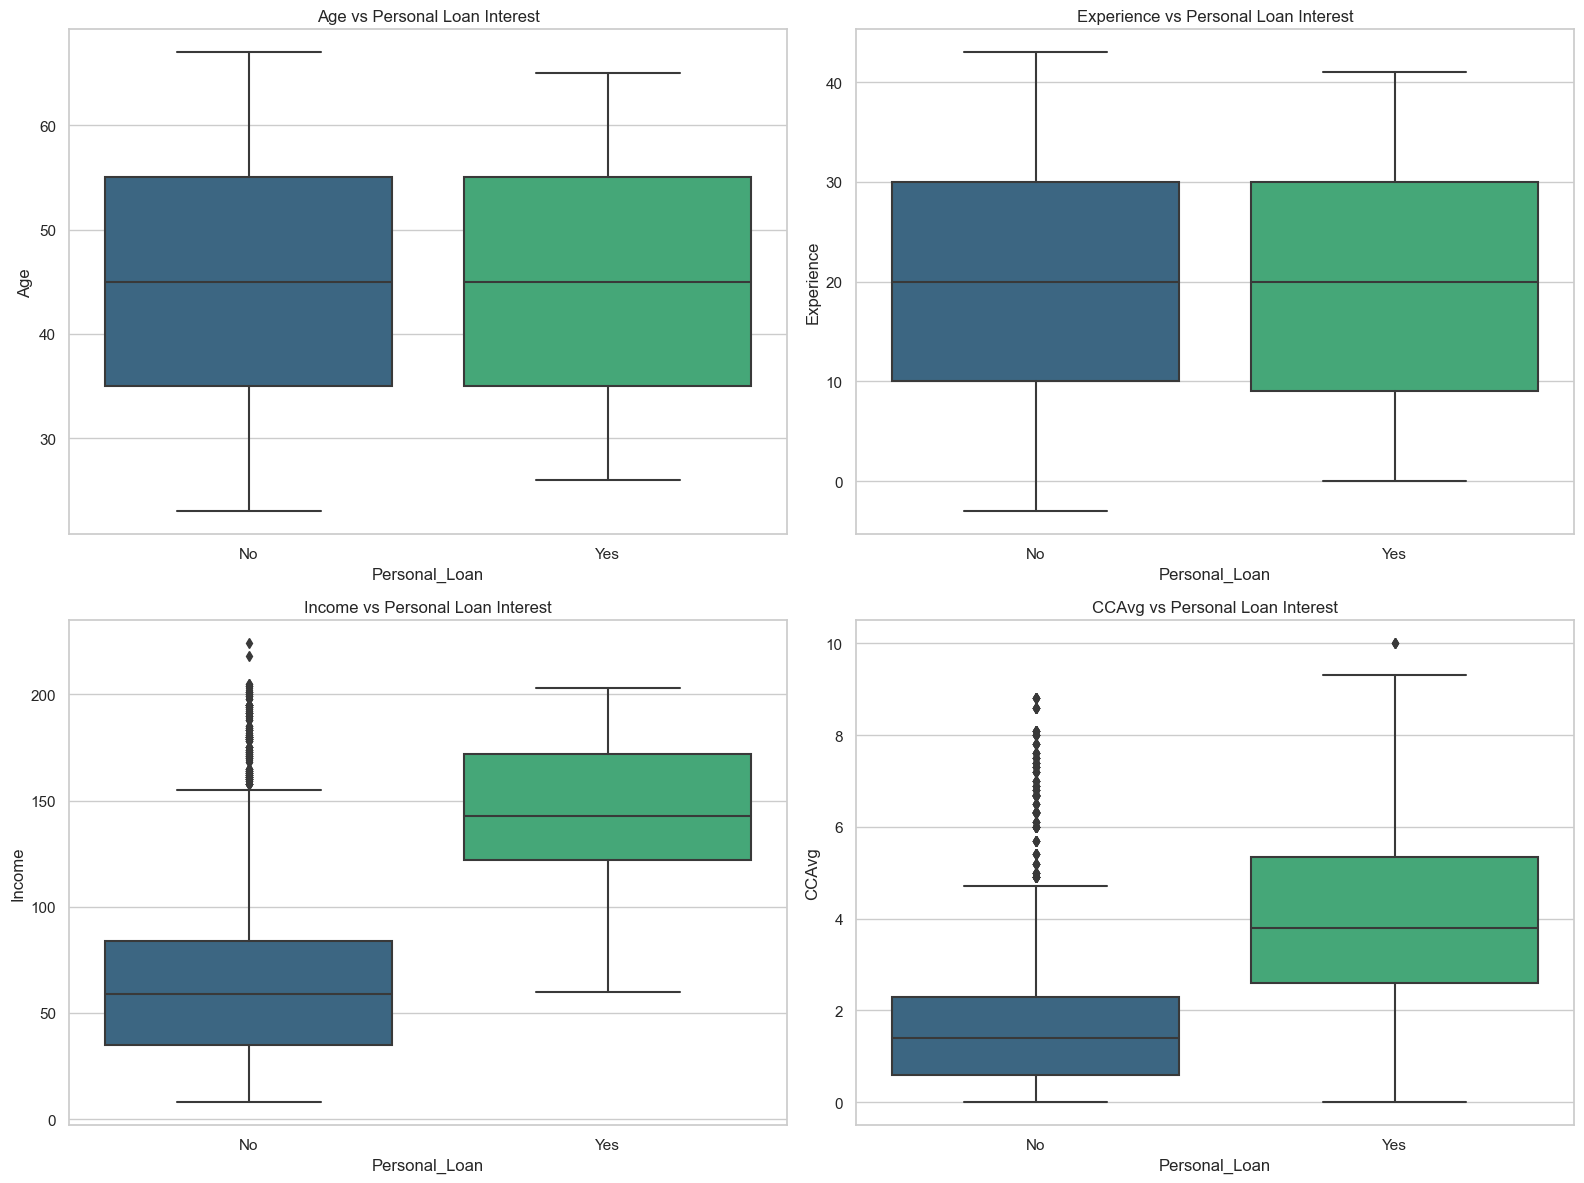

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot for Age vs Personal Loan

sns.boxplot(x='Personal_Loan', y='Age', data=data, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Personal Loan Interest')
axes[0, 0].set_xticklabels(['No', 'Yes'])

# Box plot for Experience vs Personal Loan

sns.boxplot(x='Personal_Loan', y='Experience', data=data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Experience vs Personal Loan Interest')
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Box plot for Income vs Personal Loan

sns.boxplot(x='Personal_Loan', y='Income', data=data, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Income vs Personal Loan Interest')
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Box plot for CCAvg vs Personal Loan

sns.boxplot(x='Personal_Loan', y='CCAvg', data=data, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('CCAvg vs Personal Loan Interest')
axes[1, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### Observations:

**Age and Experience**: The distributions of age and experience for customers interested in personal loans versus those who are not show considerable overlap. This suggests that age and experience, by themselves, may not be strong indicators of interest in personal loans. Both younger and older customers, as well as those with varying levels of experience, show interest in personal loans, indicating that the bank's loan products appeal across a wide demographic.

**Income**: There is a clear distinction in the income distribution between customers who are interested in personal loans and those who are not. Customers interested in personal loans tend to have higher incomes. This suggests that income is a significant factor in determining interest in personal loans, with higher-income customers more likely to consider taking a loan. The bank might focus its marketing efforts for personal loans on higher-income segments.

**CCAvg (Average Credit Card Spending)**: Similar to income, the average credit card spending shows a noticeable difference between the two groups. Customers with higher credit card spending are more likely to be interested in personal loans. This could indicate that customers who are already comfortable with credit products (as evidenced by higher credit card usage) might be more open to other forms of credit, including personal loans.

## Data Preprocessing

In [19]:
# Correcting negative experience values by taking the absolute value

data["Experience"] = data["Experience"].apply(lambda x: abs(x) if x < 0 else x)

# Verify the correction by checking for negative values again

negative_experience_check = data[data["Experience"] < 0]["Experience"].unique()

# Display the unique negative values to confirm the correction, expecting an empty array

negative_experience_check

array([], dtype=int64)

In [20]:
# Preparing the data

X = data.drop(["ZIPCode", "Personal_Loan"], axis=1)  # Exclude 'ZIPCode' and the target variable
y = data["Personal_Loan"]  # Target variable

# Splitting the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Confirming the split

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 12), (1500, 12), (3500,), (1500,))

In [21]:
X_train.shape

(3500, 12)

In [22]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_Region
1334,47,22,35,2,1.3,1,0,0,0,1,0,94
4768,38,14,39,1,2.0,2,0,0,0,1,0,93
65,59,35,131,1,3.8,1,0,0,0,1,1,91
177,29,3,65,4,1.8,2,244,0,0,0,0,94
4489,39,13,21,3,0.2,2,0,0,0,1,0,95


## Model Building

In [23]:
# Initialize the Decision Tree Classifier

model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

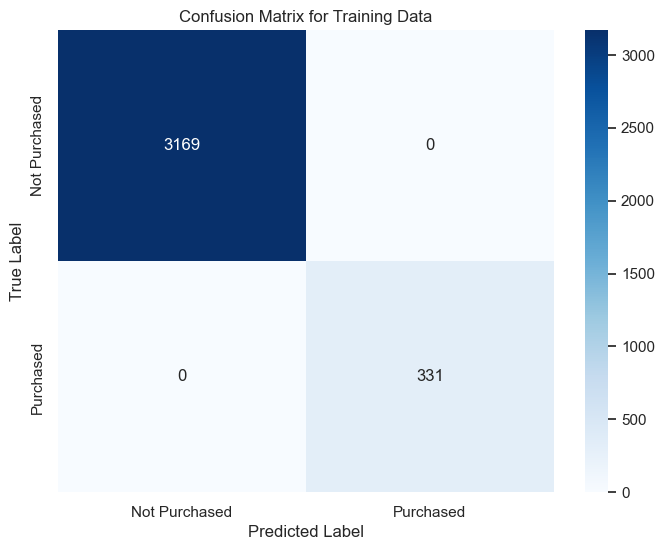

In [24]:
# Predicting the outcomes on the training data

y_train_pred = model.predict(X_train)

# Generating the confusion matrix

cm = confusion_matrix(y_train, y_train_pred)

# Visualizing the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observations:

**True Positives (TP)**: The upper left quadrant shows the number of customers correctly predicted to purchase personal loans.

**True Negatives (TN)**: The lower right quadrant shows the number of customers correctly predicted not to purchase personal loans.

**False Positives (FP)**: The upper right quadrant represents the customers incorrectly predicted to purchase personal loans (Type I error).

**False Negatives (FN)**: The lower left quadrant represents the customers incorrectly predicted not to purchase personal loans (Type II error).

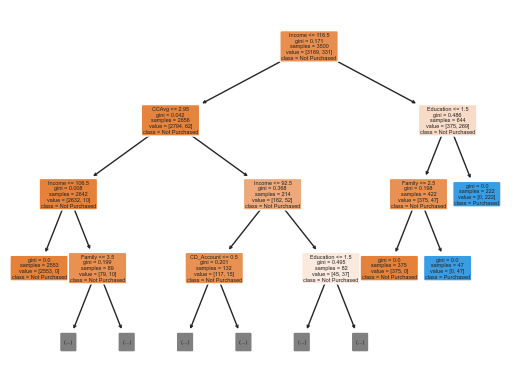

In [25]:
plot_tree(model, 
          filled=True, 
          rounded=True, 
          class_names=["Not Purchased", "Purchased"],
          feature_names=list(X.columns),  # Convert to list
          max_depth=3)

plt.show()

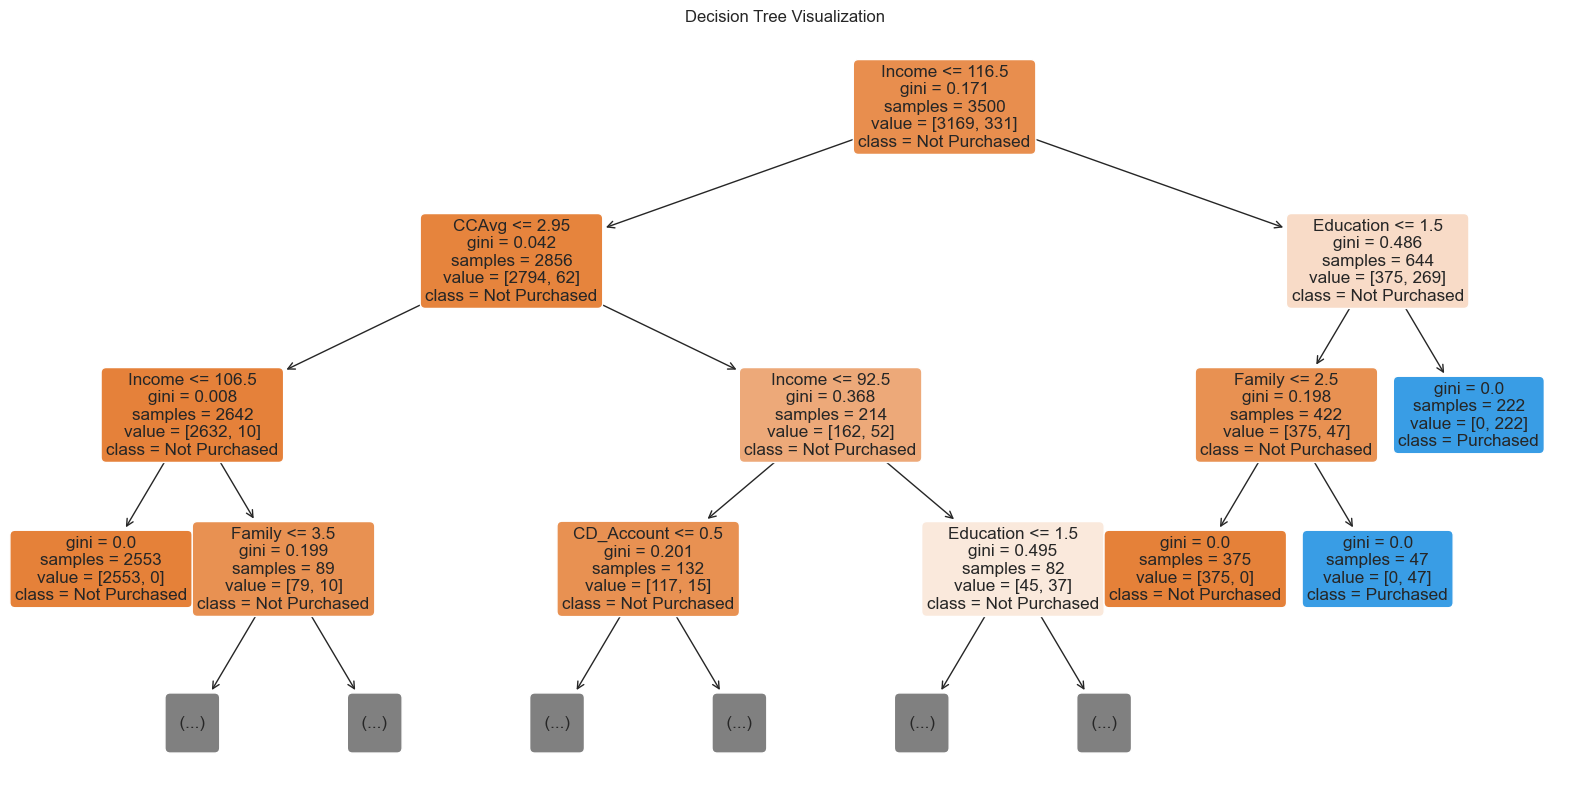

In [26]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

# Visualizing the decision tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, rounded=True, class_names=["Not Purchased", "Purchased"], feature_names=list(X.columns), max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # Accuracy Score computation
    recall = recall_score(target, pred)  # Recall Score computation
    precision = precision_score(target, pred)  # Precision Score computation
    f1 = f1_score(target, pred)  # F1 Score computation

    # creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [28]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Build Decision Tree Model

In [29]:
# Initialize the Decision Tree Classifier

model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training data

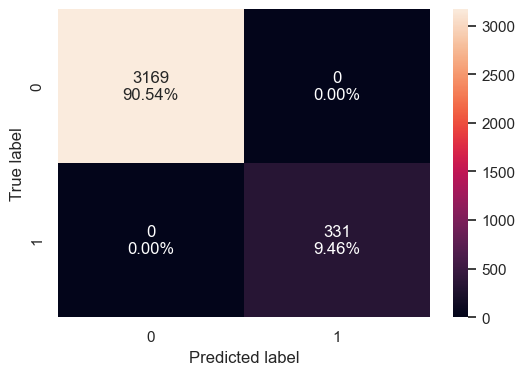

In [30]:
# Use confusion matrix to visualize model performance on training data

confusion_matrix_sklearn(model, X_train, y_train)

In [31]:
# Display performance for decision tree on train data

decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Visualizing the Decision Tree

In [32]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_Region']


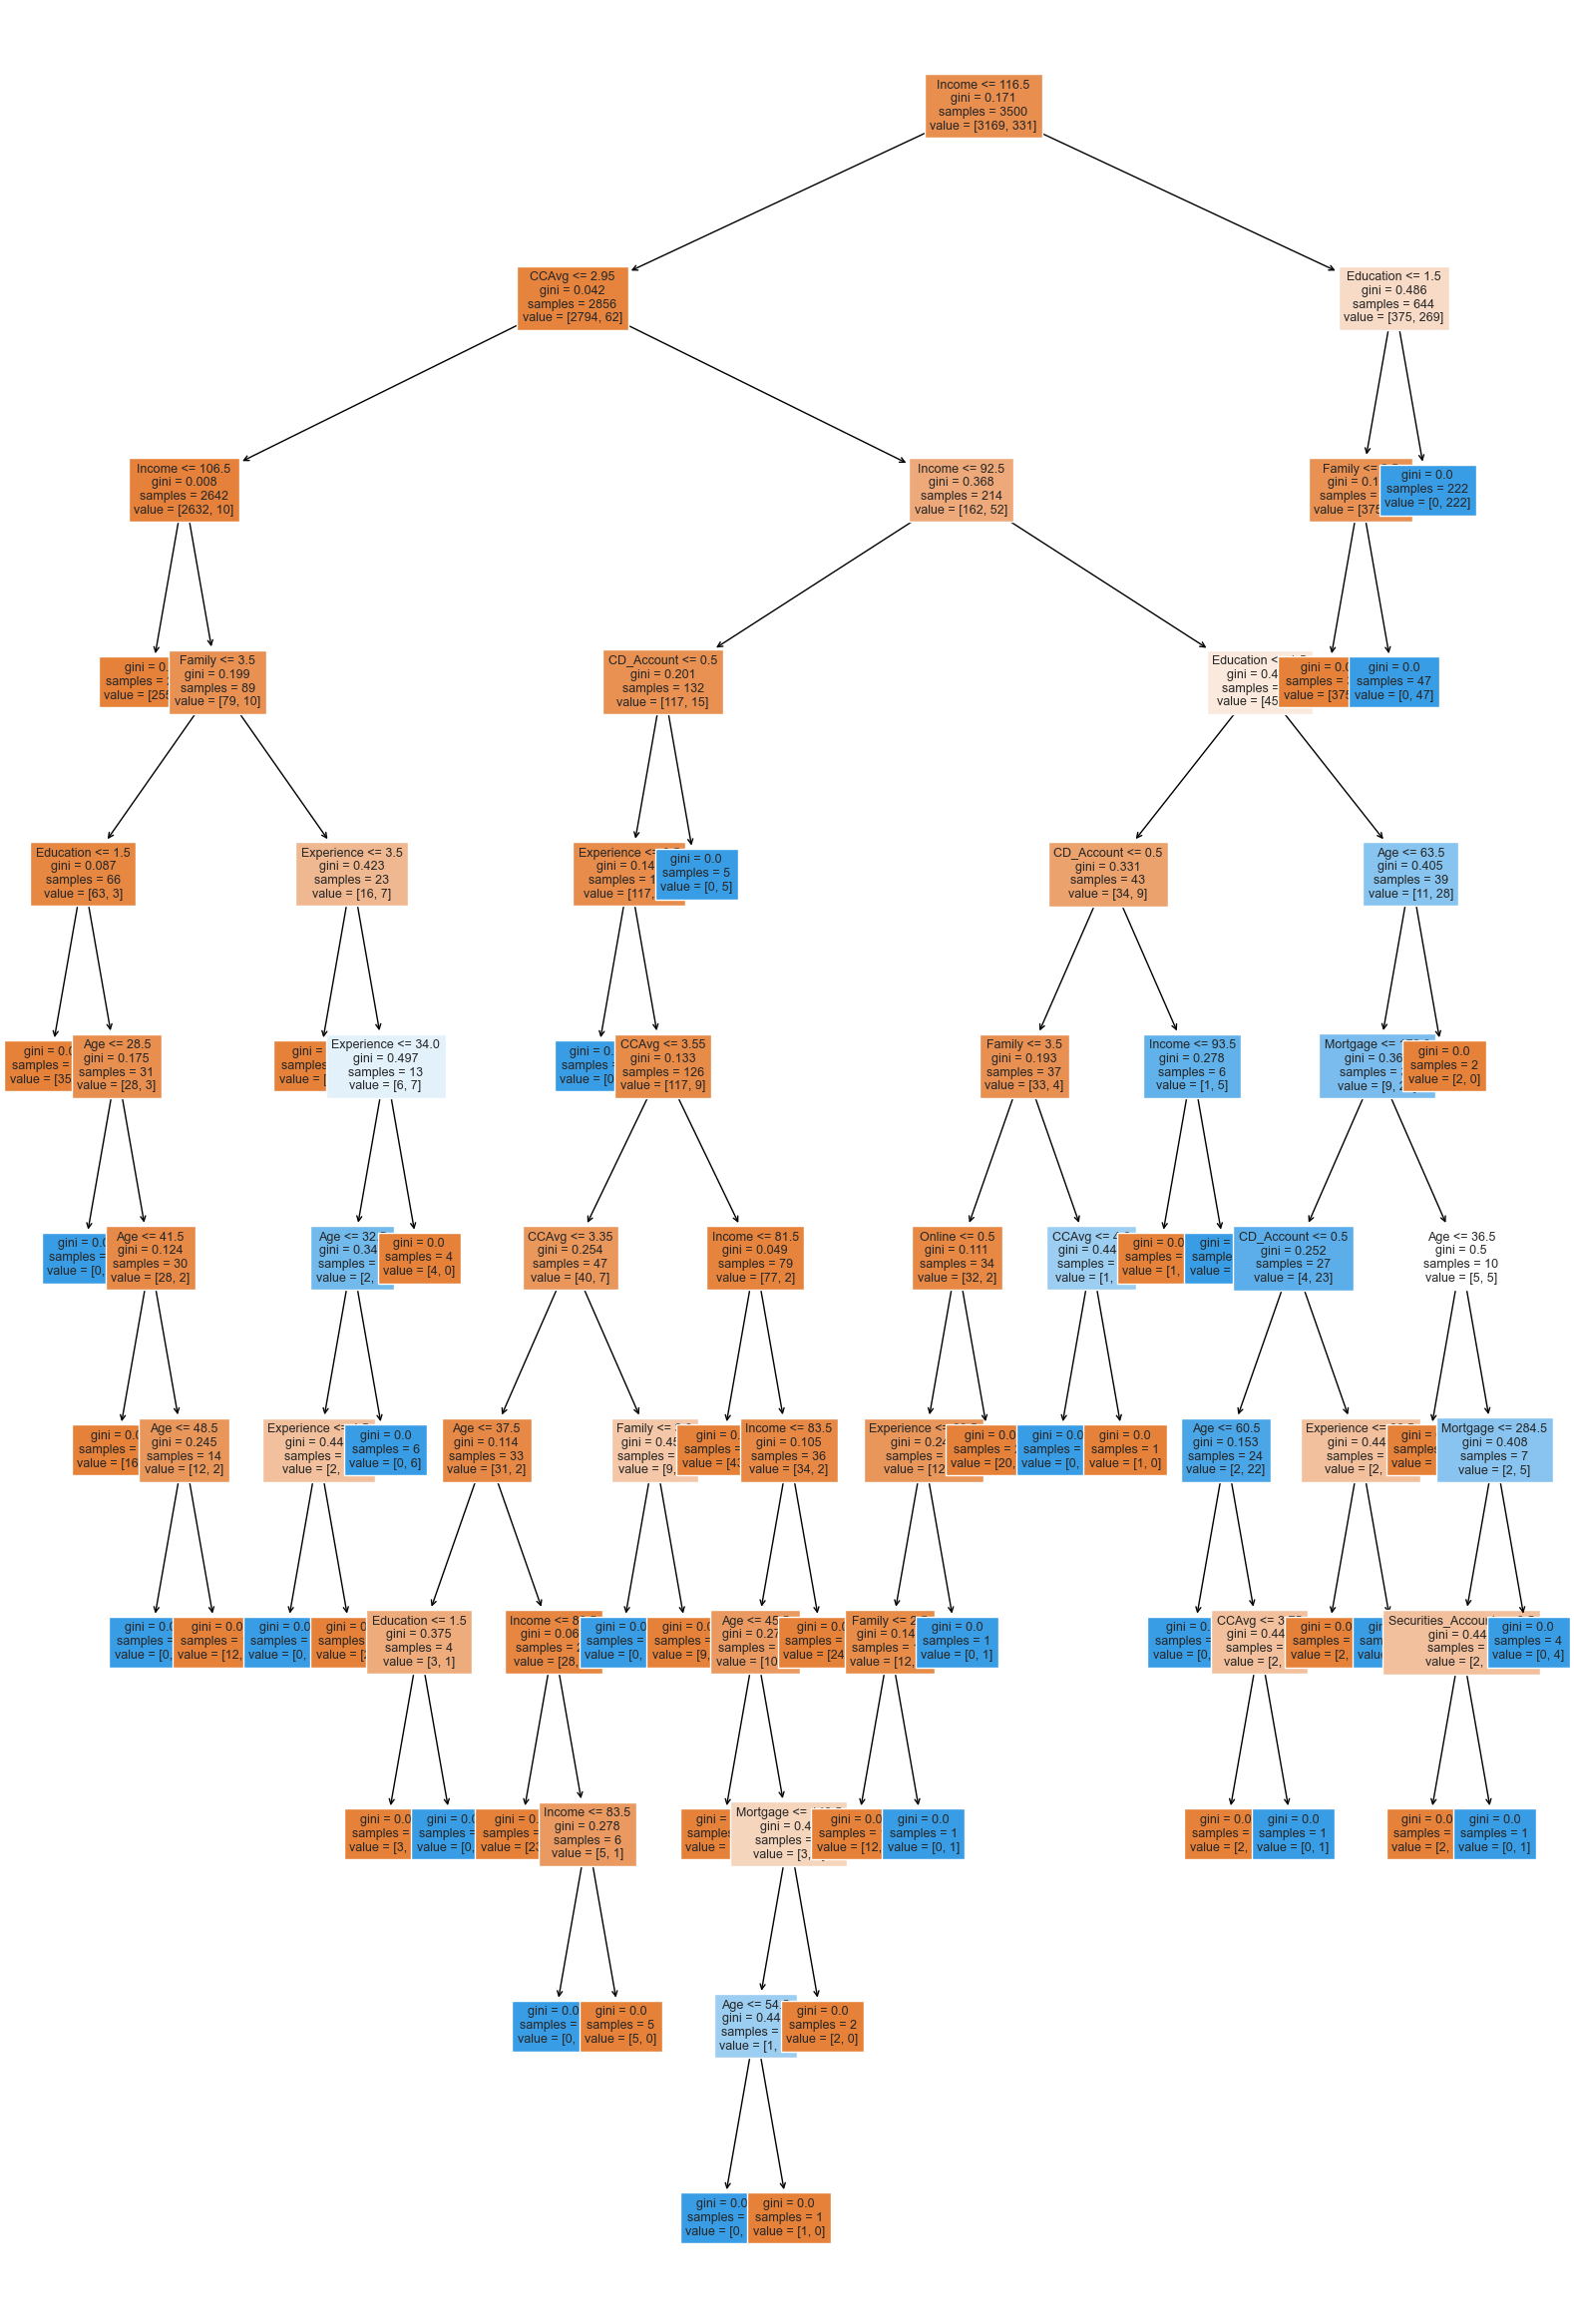

In [33]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None)

# Ensure that arrows are added to decision tree in case they are missing

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [34]:
# Determine Gini Importance

print(pd.DataFrame(model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Education           0.403968
Income              0.304761
Family              0.160377
CCAvg               0.046632
Age                 0.027427
CD_Account          0.025711
Experience          0.021001
Mortgage            0.007336
Securities_Account  0.002224
Online              0.000561
CreditCard          0.000000
ZIPCode_Region      0.000000


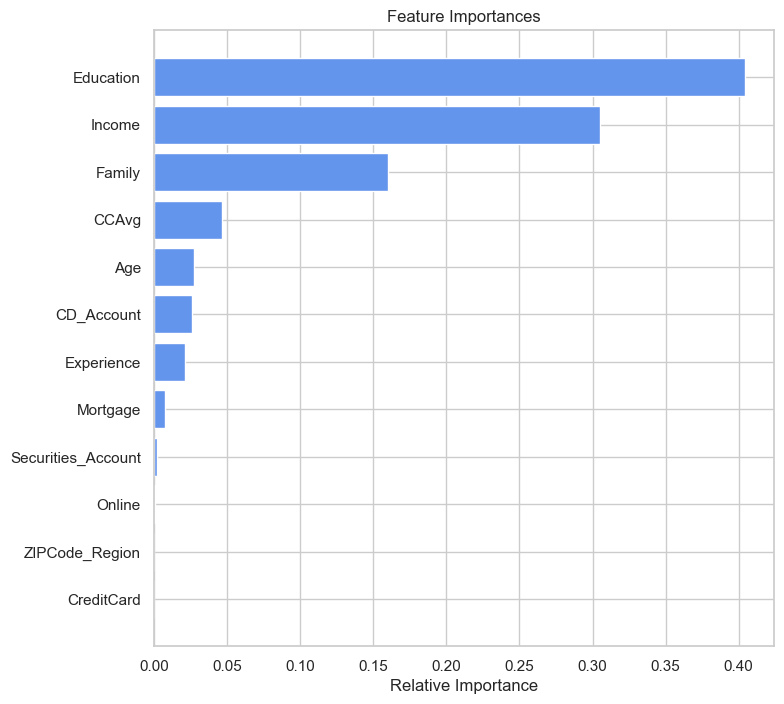

In [35]:
# Visualize model feature importances

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="cornflowerblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Checking model performance on test data

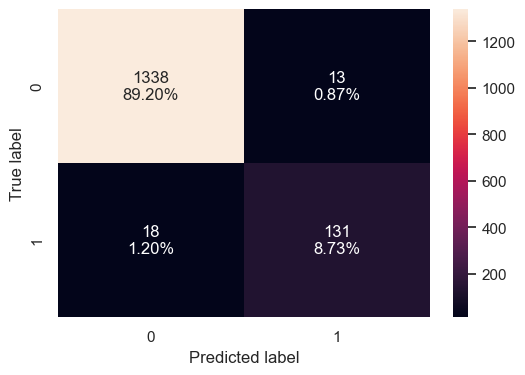

In [36]:
# Use confusion matrix to check model performance on test data

confusion_matrix_sklearn(model, X_test, y_test) 

In [37]:
# Display performance for decision tree on test data

decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.879195,0.909722,0.894198


### Model Performance Improvement

### Pre-Pruning

In [38]:
# Use decision tree classifier

estimator = DecisionTreeClassifier(random_state=1)

# Choose parameters for pruning

parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],}

# This scorer will be used to compare parameter combinations

acc_scorer = make_scorer(recall_score)

# Run the grid search using GridSearchCV

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters

estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

### Checking performance on training data

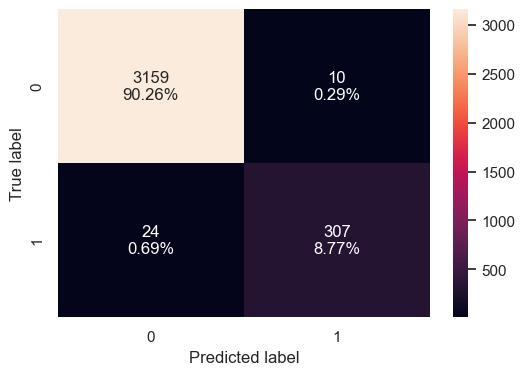

In [39]:
# Use confusion matrix to check model performance on training data

confusion_matrix_sklearn(estimator, X_train, y_train) 

In [40]:
# Display performance for decision tree on train data

decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


### Visualizing the Decision Tree

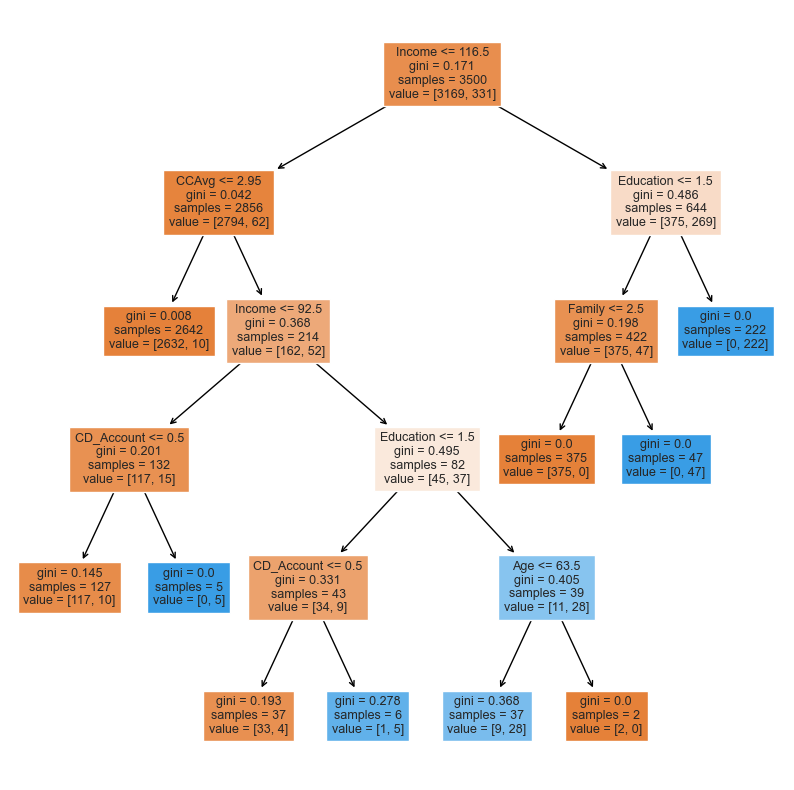

In [41]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None)

# Ensure that arrows are added to decision tree in case they are missing

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
        
plt.show()

In [42]:
# Print Gini Importance for columnns in the updated model

print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Education           0.446191
Income              0.327387
Family              0.155083
CCAvg               0.042061
CD_Account          0.025243
Age                 0.004035
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_Region      0.000000


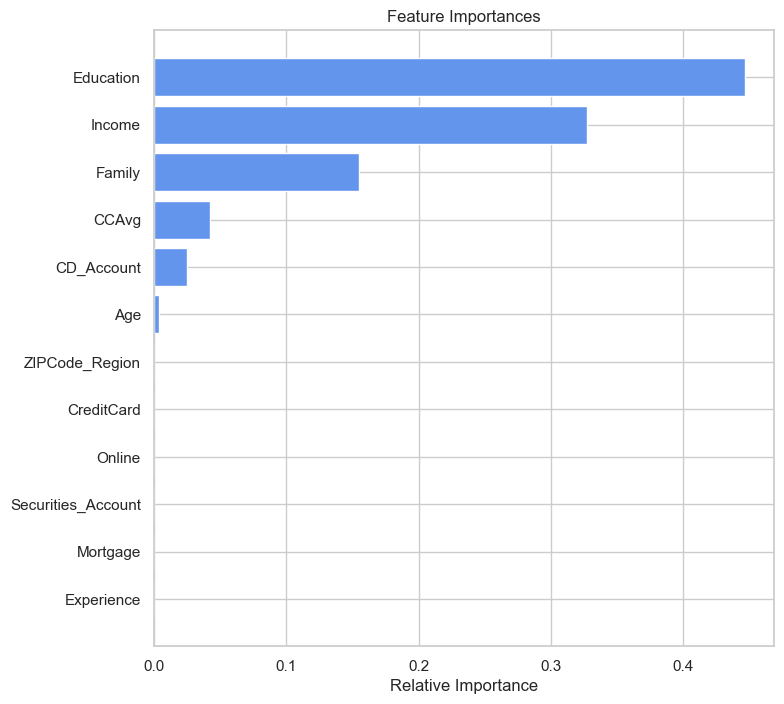

In [43]:
# Visualize updated model feature importances

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="cornflowerblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Checking performance on test data

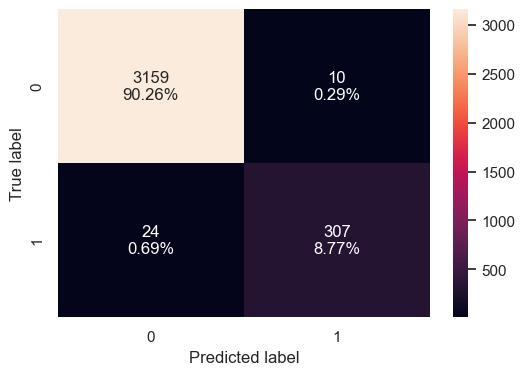

In [44]:
# Use confusion matrix to check performance on test data

confusion_matrix_sklearn(estimator, X_train, y_train)

In [45]:
# Display model performance on test data

decision_tree_tune_perf_test = model_performance_classification_sklearn( estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


### Cost-Complexity Pruning

In [46]:
# Apply pruning to reduce complexity in the model that leads to inappropriate fitting

clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [47]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000268,0.002188
3,0.000359,0.003263
4,0.000381,0.003644
5,0.000381,0.004025
6,0.000381,0.004406
7,0.000381,0.004787
8,0.000381,0.005168
9,0.000409,0.006804


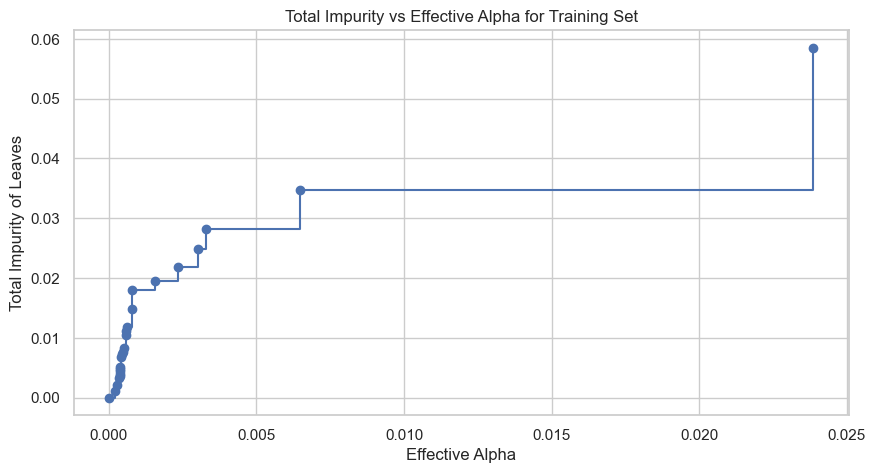

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

In [49]:
# Fit the decision tree on training data

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


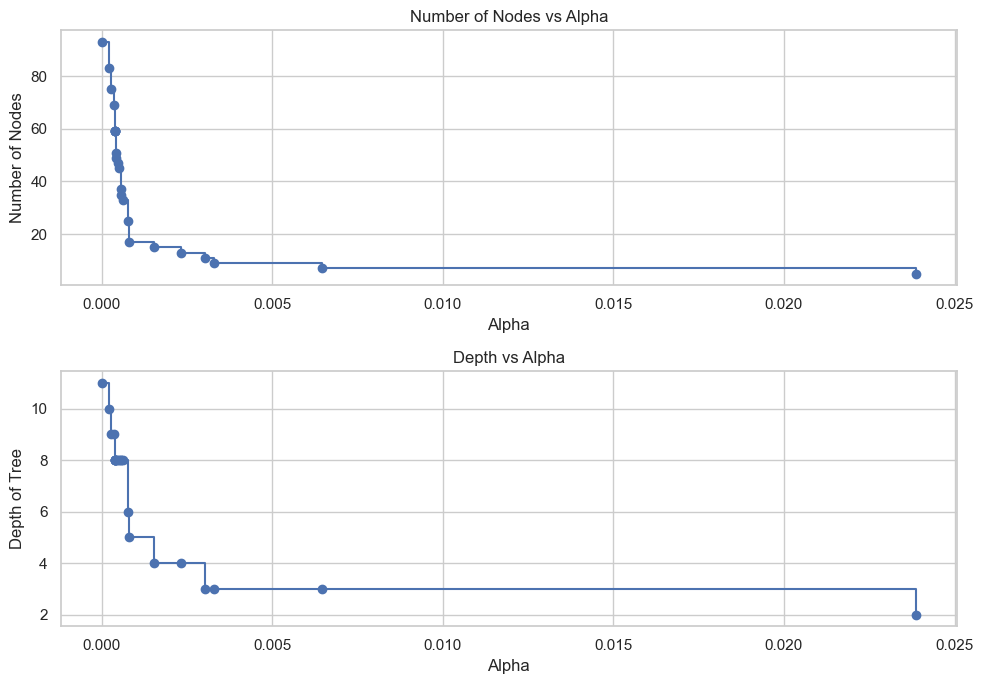

In [50]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [51]:
# Examine recall values in training and testing sets

recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

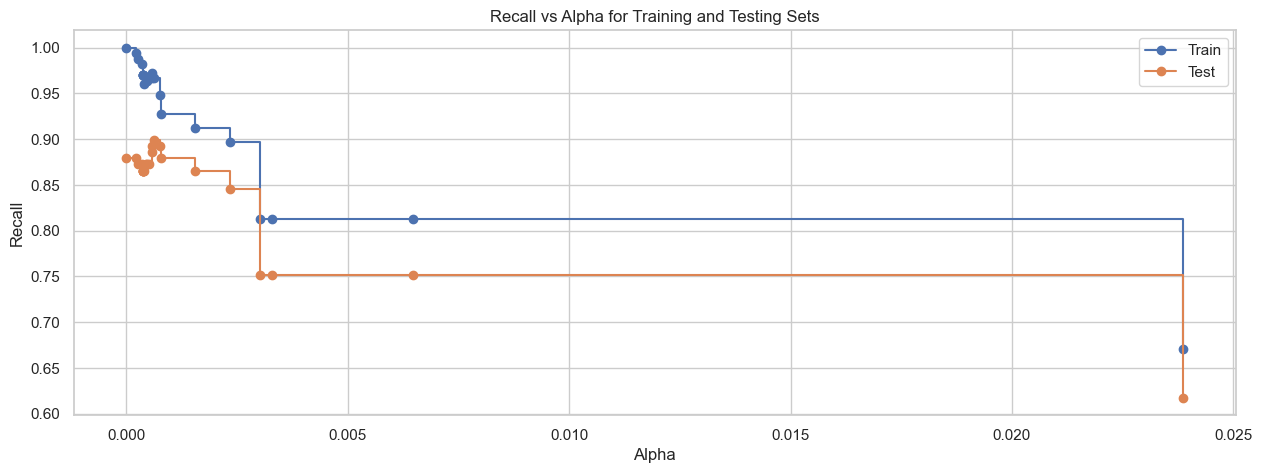

In [52]:
# Display Recall vs Alpha for Training and Testing Sets

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="Train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="Test", drawstyle="steps-post")
ax.legend()
plt.show()

In [53]:
# Print best model after testing recall for training and testing sets

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


### Post-Pruning

In [54]:
estimator_2 = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85}, random_state=1)

estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

### Checking performance on training data

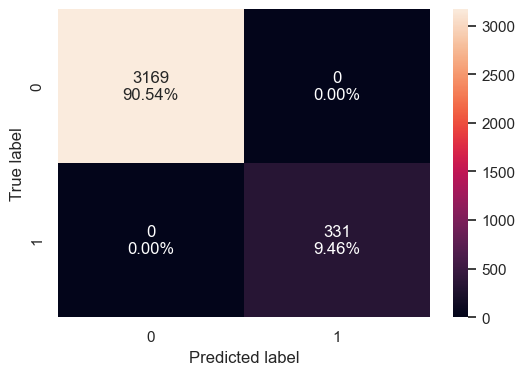

In [55]:
# Use confusion matrix to check performance on train data

confusion_matrix_sklearn(model, X_train, y_train)

In [56]:
# Display model performance on train data

decision_tree_tune_post_train = model_performance_classification_sklearn( estimator, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


### Visualizing the Decision Tree

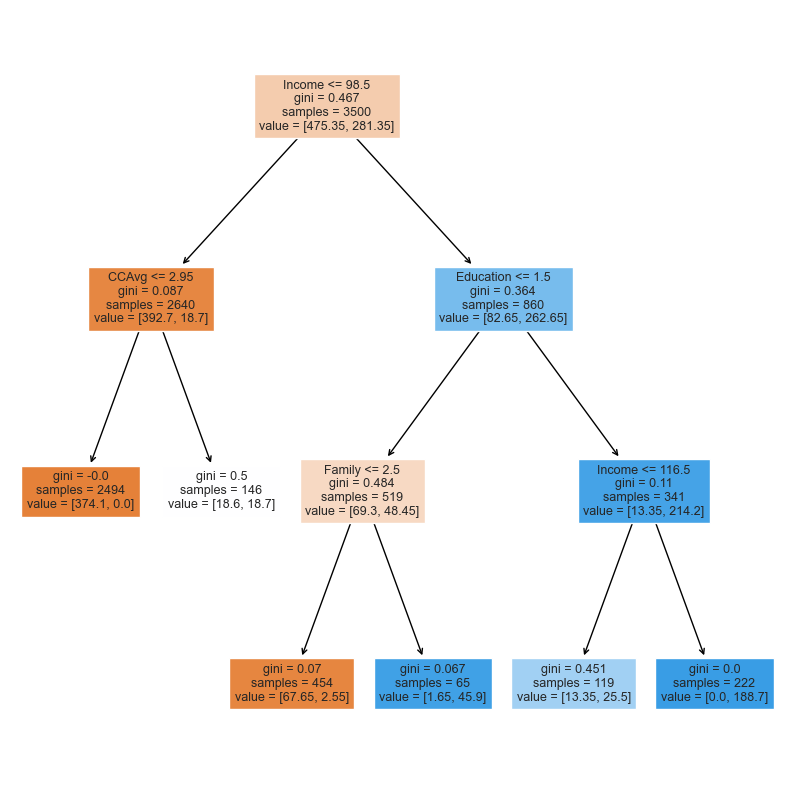

In [57]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
        
plt.show()

In [58]:
# Determine Gini Importance

print(pd.DataFrame(estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.645704
Family              0.158240
Education           0.140915
CCAvg               0.055142
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_Region      0.000000


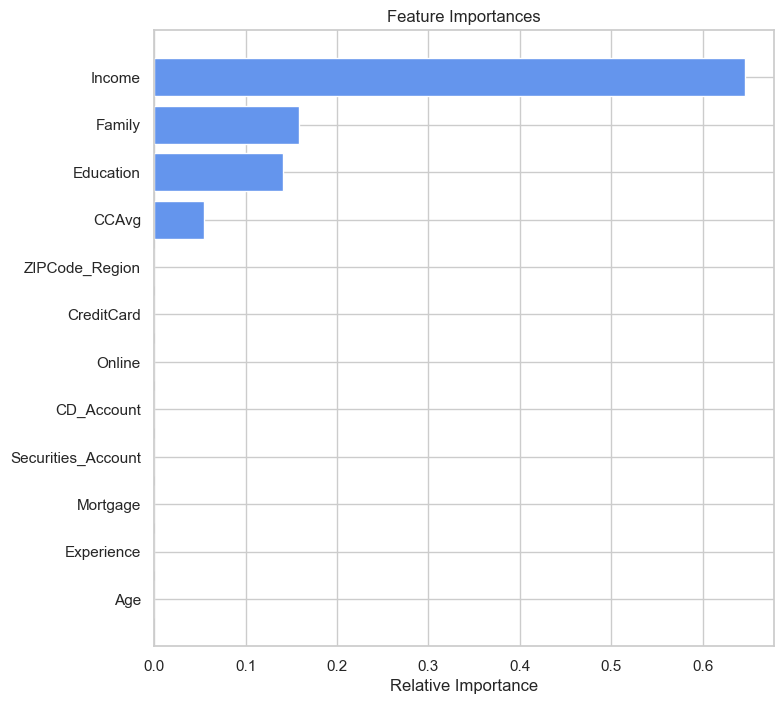

In [59]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="cornflowerblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Checking performance on test data

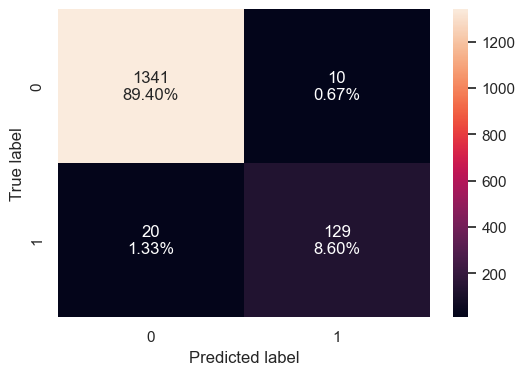

In [60]:
# Use confusion matrix to check performance on test data

confusion_matrix_sklearn(estimator, X_test, y_test)

In [61]:
# Display model performance on test data

decision_tree_tune_post_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


## Model Performance Comparison

In [62]:
# Model performance comparison

models_train_comp_df = pd.concat([decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,)

models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.990286
Recall,1.0,0.927492,0.927492
Precision,1.0,0.968454,0.968454
F1,1.0,0.947531,0.947531


### Observations:

We are hoping to improve the recall score but the decision trees based on training data show no difference.

In [63]:
# Perform performance comparison

models_train_comp_df = pd.concat([decision_tree_perf_test.T,decision_tree_tune_perf_test.T,], axis=1,)

models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)",]

print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.979333,0.980000
Recall,0.879195,0.865772
Precision,0.909722,0.928058
F1,0.894198,0.895833


### Observations:

We are hoping to improve the recall score so the pruned decision tree has a slight edge and is the optimal choice in this situation.

## Actionable Insights and Business Recommendations

### Suggestions:

#### Demographic Segmentation:

* **Age Groups**: Create categorical variables based on age to capture different financial needs and risk profiles associated with each life stage.

* **Income Brackets**: Segment customers into different income brackets. Financial behavior often correlates strongly with income levels.

#### Financial Behavior Metrics:

* **Account Balance Growth Rate**: Calculate the growth rate of customer deposits over time to identify customers who are increasing their savings and might be interested in investment or loan products.

* **Transaction Frequency**: Frequency of transactions, both deposits and withdrawals, can indicate account activity levels and engagement with the bank.

#### Credit Utilization and History:

* **Existing Loans and Liabilities**: Information on existing loans, if available, can help in assessing a customer's debt burden and their capacity to take on new loans.

* **Credit Score Estimation**: If not directly available, you might approximate a credit score based on available features (e.g., account balances, transaction patterns, loan history).

#### Interaction with Bank Channels:

* **Digital Engagement**: Create features based on the use of online banking, mobile apps, etc., as digitally engaged customers might be more receptive to online loan offers.

* **Product Utilization**: Number and types of products (e.g., savings accounts, credit cards, investment products) used by the customer can indicate their relationship strength with the bank.

#### Geographical Factors:

* **Regional Economic Indicators**: Incorporate regional economic factors such as average income, employment rate, or real estate prices, which might influence loan needs.

* **Bank's Market Presence**: The number of branches or ATMs in the customer's area could affect their access to and interaction with the bank.

#### Temporal Features:

* **Seasonality**: Certain times of the year might see increased loan uptake (e.g., holiday seasons, back-to-school periods). Creating features to capture this seasonality could be useful.

* **Customer Tenure**: The length of time a customer has been with the bank may impact their loyalty and openness to new offers.

#### Interaction Features:

* **Cross-Product Interactions**: Features that capture interactions between different products (e.g., deposit amount vs. investment products) might reveal complex behaviors.

* **Feature Polynomial Combinations**: Combining features (e.g., age * income bracket) can sometimes expose non-linear relationships that are not apparent when considering the features independently.